# House prices analysis

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
house_data= pd.read_csv('data.csv')
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## EDA Exploratory Data Analysis

In [7]:
## removing double values or duplicates
house_data.drop_duplicates().head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## Display basic information about the dataset


In [8]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

### Summary statistics for numeric columns

In [9]:
house_data.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


### Check for missing values

In [10]:
house_data.isnull().sum()


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

## Cheking the most demanded bedrooms per city

 ###  Visualize the distribution of the target variable 'price'

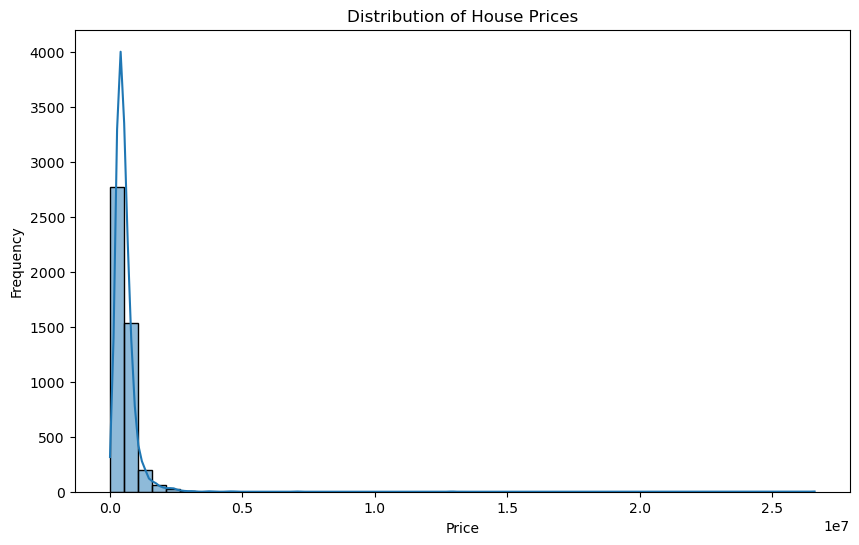

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(house_data['price'], bins=50, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

The visual show the different price range in our dataset it show theres is low price variability


### Visualize relationships between numeric features

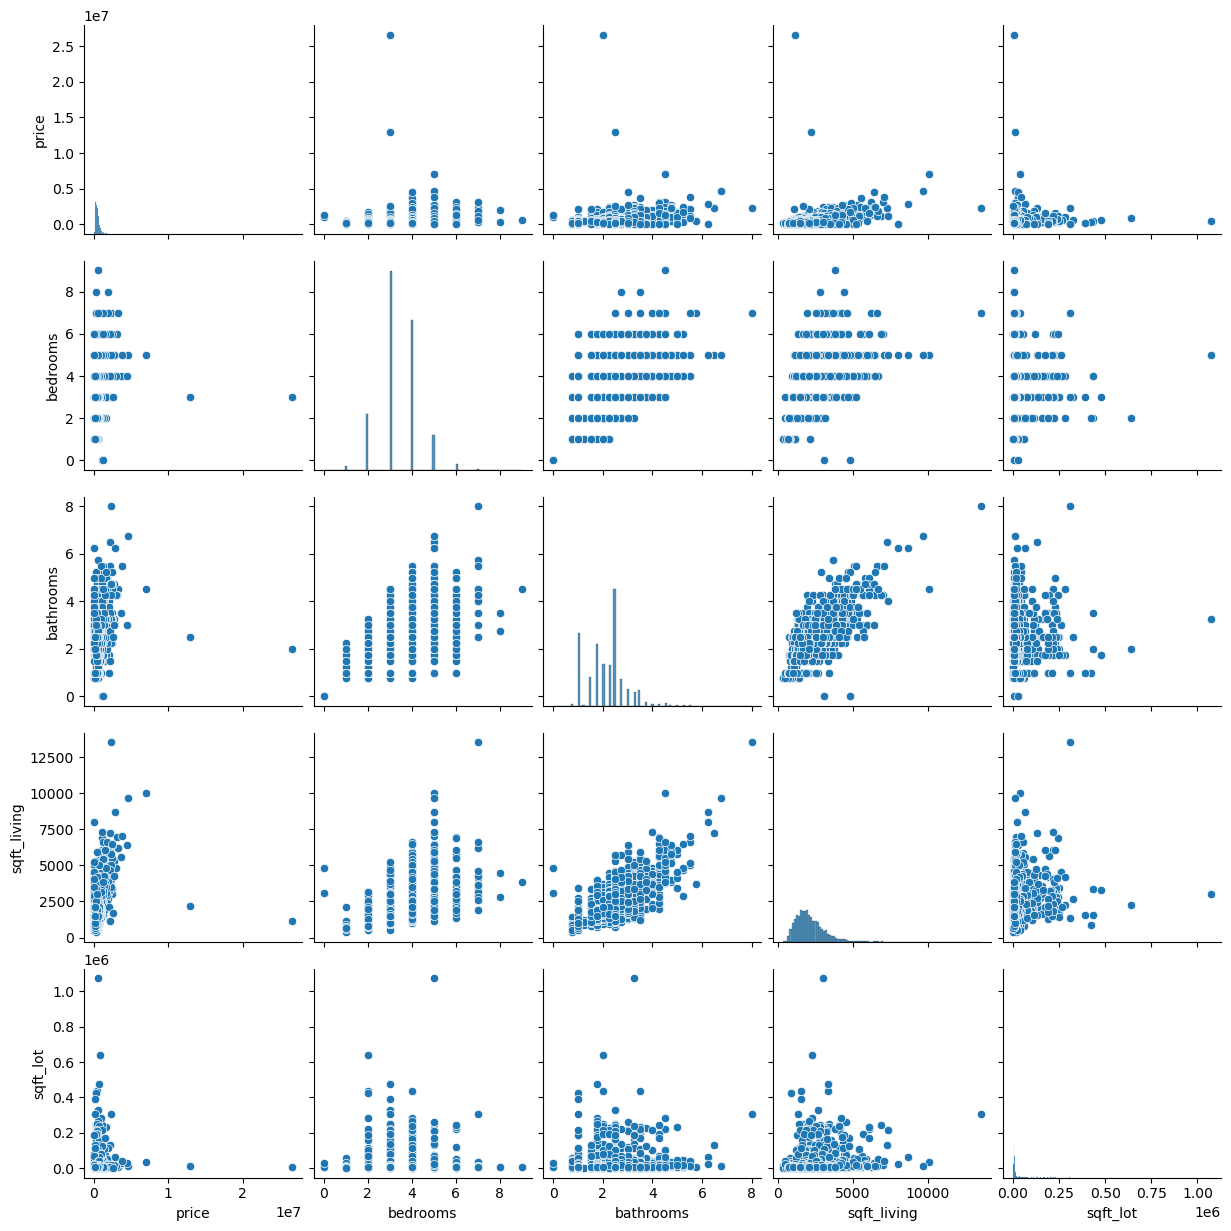

In [10]:
sns.pairplot(house_data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']])
plt.show()

### Visualize correlations between numeric features

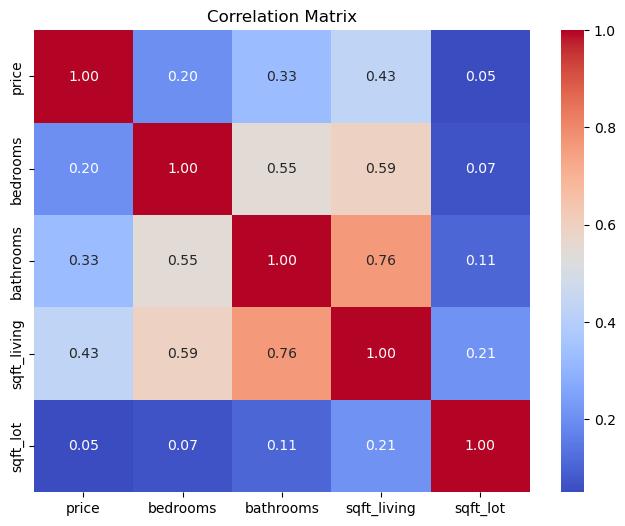

In [11]:
correlation_matrix = house_data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Visualize categorical variables

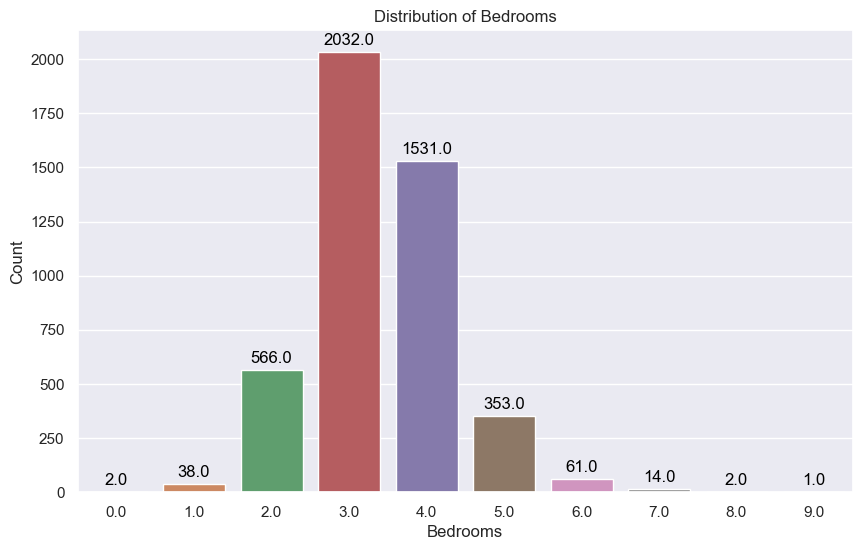

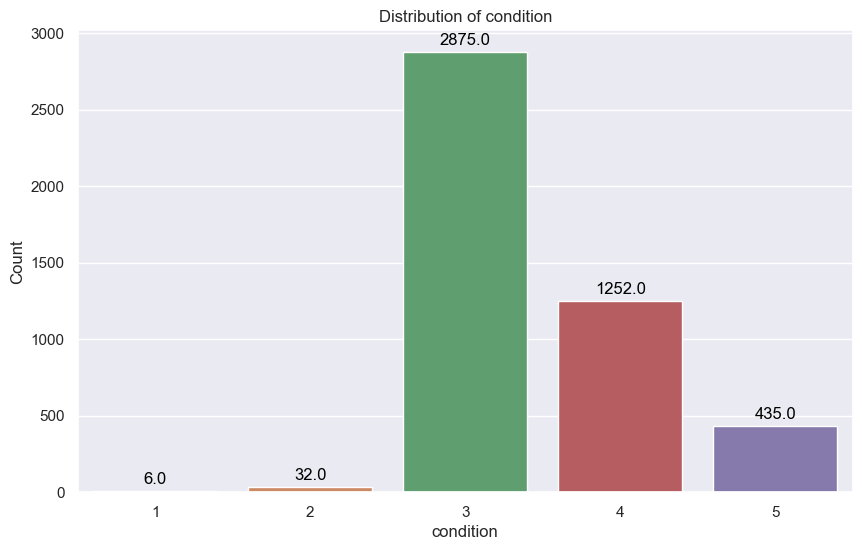

In [31]:
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")  
ax = sns.countplot(data=house_data, x='bedrooms')

# Annotate the count at the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.title('Distribution of Bedrooms')
plt.show()


plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")  # Optional: Set a grid background
ax = sns.countplot(data=house_data, x='condition')

# Annotate the count at the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('condition')
plt.ylabel('Count')
plt.title('Distribution of condition')
plt.show()

 1. Bedroom category we had highiest number of properties being three bedrooms at 2032 followed 1531 four bedroom 
 2. Condition category we  435 In Goood condition  2875 in medium quality with 6 low quality

### Visualize relationships between categorical variables and the target 'price'


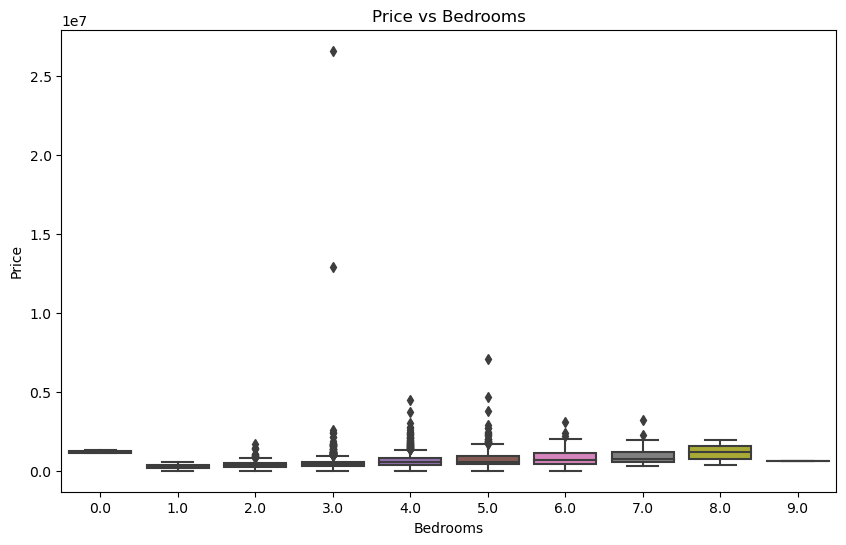

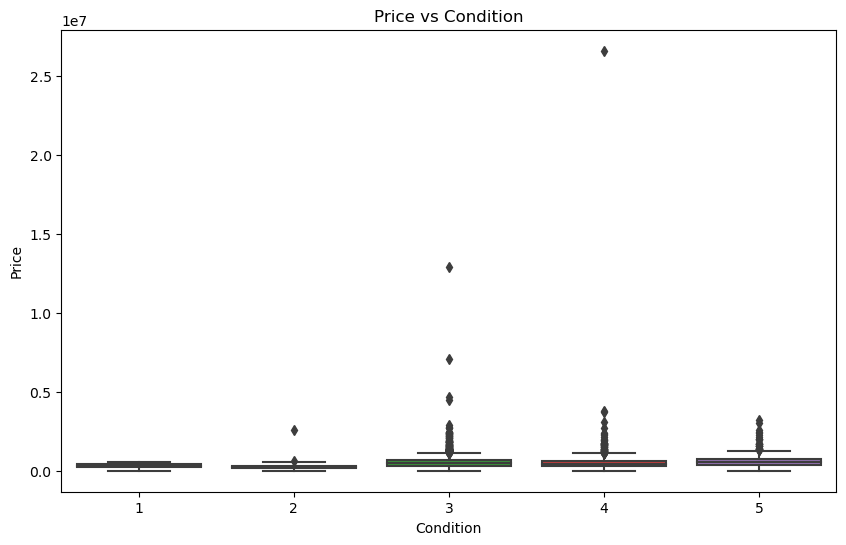

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=house_data)
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Price vs Bedrooms')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=house_data)
plt.xlabel('Condition')
plt.ylabel('Price')
plt.title('Price vs Condition')
plt.show()

The prices tend to increase as the number of rooms increase
The prices are lower when the condition of the house is lower

## Features Engineering
creating new feeatures Age from the year property was created

In [12]:
## we create a current year 
import datetime
current_year = datetime.datetime.now().year 
# new column age
house_data['age'] = current_year - house_data['yr_built']
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,age
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,68
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,102
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,57
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,60
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,47


## Selecting features which are relevant for predicting house price

We use correlation analysis :
Features with higher absolute correlation values (positive or negative) are more relevant for prediction.

C:\Users\Mr bones\AppData\Local\Temp\ipykernel_6492\3808402453.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = house_data.corr()


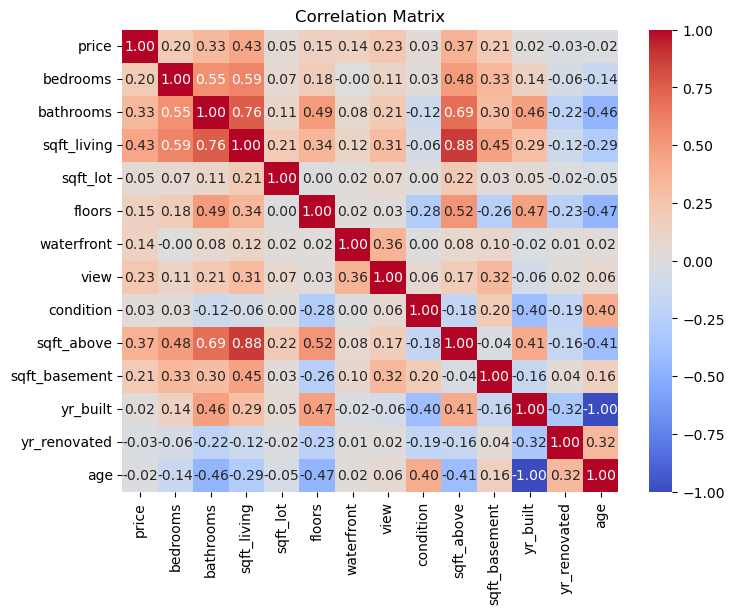

In [13]:
correlation_matrix = house_data.corr()
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
correlation_with_price
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


  From the visual above show some features with positive and negative values 
    where negative correlation to 'price' indicate an inverse relationship
    Negative correlations can be valuable if they make sense in the context. 
    For example, features like 'age' (the age of the property) often have a 
    negative correlation with price because older properties tend to be less valuable.
    positive correlation to 'price' indicate a direct relationship. 
    As the values of these features increase, the house price tends to increase, and vice versa.

## Data spliting
Spliting dataset into training, validation and testing_set

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
X = house_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','age']]
y = house_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

## Create a Model

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Make predictions

In [20]:
y_pred = model.predict(X_test)

In [21]:
model.score(X_test,y_test)

0.057648347807300326

In [22]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 680803820471.9425


In [24]:
predict_price=[[3,2,1400,9000,8]]
new=model.predict(predict_price)
new

C:\Users\Mr bones\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([212505.679478])